In [2]:
%matplotlib inline
from ppclass import pp
import matplotlib.pyplot as mpl
mpl.rcParams['font.family'] = "times" # for good log major/minor ticks
mpl.rcParams['lines.linewidth'] = 3.0

In [3]:
ini = pp()
ini.quiet = True
ini.file = "/home/aspiga/data/dynamico-giant/tprecast_999.nc"
ini.x = 999
ini.useindex = "1000"
ini.ndiv = 50
ini.title = ""

In [4]:
dayperyear = 24430.
secondperday = 38052.
outputfreq = 500.
deltafile = outputfreq / dayperyear
print deltafile

0.0204666393778


In [5]:
def roughindex(ls,year):
    ## this is the year_th simulated year
    return int(((year-1)*49.) + (ls*49./360.))

In [6]:
lim = 20
st = roughindex(0,9)
en = roughindex(0,13)

st = roughindex(0,2)
en = roughindex(0,2.5)
print st,en

st = roughindex(0,2.5)
en = roughindex(0,3.0)

#st = roughindex(0,12.5)
#en = roughindex(0,13.0)

import numpy as np
import planets
myp = planets.Saturn

yy = np.arange(1,15,0.25)
print yy

49 73
[ 1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75
  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25 12.5  12.75
 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75]


73 98


/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


539 563


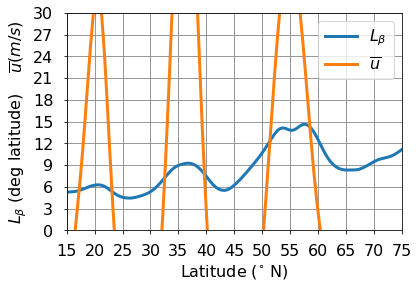

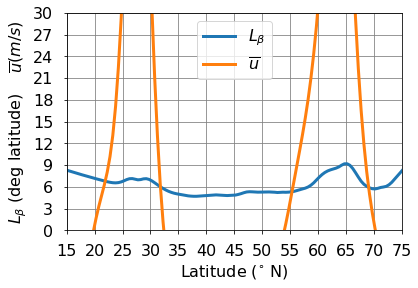

In [7]:
tab_width = np.array([])
tab_ri_width = np.array([])
tab_spacing = np.array([])
tab_ri_spacing = np.array([])


inter=1

#for yy in np.arange(2,3,0.5):
#for yy in [2.5,11.5]:
for yy in [2.5,12]:
    
    st = roughindex(0,yy)
    en = roughindex(0,yy+0.5)
    print st,en

    req = pp()
    req << ini
    req.var = "eke"
    req.t = "%i,%i" % (st,en)
    req.z = "1e5,1e3"
    eke,x,y,z,t = req.getfd()
    betatab = myp.beta(lat=y)
    rhines = 2.*np.pi*np.sqrt(np.sqrt(eke)/betatab)
    rhines = rhines / 1.e6
    #rhines = rhines[lim:-lim:1]

    req.var = "u"
    u = req.getf()
    #u = u[lim:-lim:1]

    import ppplot

    ppplot.changefont(16)
    fig = ppplot.figuref(x=6,y=4)

    pl = ppplot.plot1d(fig=fig)
    pl.f = rhines
    pl.x = y
    pl.ymin = 0
    pl.ymax = 30
    pl.nyticks = 10

    pl.xmin = 15
    pl.xmax = 75
    pl.nxticks = 12

    pl.marker = ''
    pl.linestyle = '-'
    pl.legend = r'$L_{\beta}$'
    pl.ylabel = r'$L_{\beta}$ (deg latitude)    $\overline{u} (m/s)$'
    pl.xlabel = 'Latitude ($^{\circ}$ N)'
    pl.make()

    pl.f = u 
    pl.legend = r'$\overline{u}$'
    pl.make()    
    
    ppplot.save(filename="rhines_%i_%i" % (st,en),mode="pdf")
    
    windlim = 10. # wind value at which we calculate width / spacing
    yi = np.arange(-90,90,0.01) 
    ui = np.interp(yi,y,u)
    ri = np.interp(yi,y,rhines)
    dist = np.abs(ui-windlim)
    yeah = np.sort(dist)
    eps = 1e-1
    w = np.where(dist < eps)
    zezeros, indices = np.unique(np.round(yi[w],1), return_index=True)
    #print indices
    #print yi[w][indices]
    riri = np.round(ri[w][indices],1)
    w = np.where(zezeros>0)
    zezeros = zezeros[w]
    riri = riri[w]
    intervals = np.diff(zezeros)
    #print intervals
    #print riri
    riri1 = riri
    riri2 = np.roll(riri,1)
    ririi = (riri1 + riri2)/2.
    #print ririi
    width = intervals[0::2]
    spacing = intervals[1::2]
    ri_width = ririi[1::2]
    ri_spacing = ririi[2::2]
    #print width,ri_width 
    #print spacing,ri_spacing
    
    tab_width = np.append(tab_width,width)
    tab_ri_width = np.append(tab_ri_width,ri_width)
    tab_spacing = np.append(tab_spacing,spacing)
    tab_ri_spacing = np.append(tab_ri_spacing,ri_spacing)

In [1]:
#print tab_width
#print tab_ri_width
#import ppplot
#pl = ppplot.plot1d()
#pl.f = np.array(tab_spacing)
#pl.x = np.array(tab_ri_spacing)
#pl.linestyle = ""
#pl.make()